In [1]:
import os
import datetime
import datalib_mt5 as dlm
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import my_pre_processing_routine as mpr

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
print(tf.__version__)

2.3.0


## ===========================================================================

In [ ]:
dlm.insert_db()

continue(y/n)? >>>  y
continue(y/n)? >>>  y
continue(y/n)? >>>  y
continue(y/n)? >>>  y
continue(y/n)? >>>  n


current in: D:/Workspace/jupyter_workspace/my_advisor/db/m10_batch_3.db


new will delete currents tables.
new set (y/n)? >>>  y


In [6]:
full_batch_1 = dlm.request_table()
full_batch_1.t_DATE.unique()

array(['2020.08.10', '2020.08.11', '2020.08.12', '2020.08.13',
       '2020.08.14'], dtype=object)

In [7]:
full_batch_2 = dlm.request_table()
full_batch_2.t_DATE.unique()

In [7]:
full_batch_3 = dlm.request_table()
full_batch_3.t_DATE.unique()

In [7]:
shift = 10
target = 10
full_feature_list = ['t_BID','t_ASK','t_LAST','iAC','iAD','iADX','iADXWilder','iAlligator','iAMA','iAO','iATR','iBearsPower','iBands','iBullsPower','iCCI','iChaikin','iDEMA','iDeMarker','iEnvelopes','iForce','iFractals','iFrAMA','iIchimoku','iBWMFI','iMomentum','iMFI','iMA','iOsMA','iMACD','iOBV','iSAR','iRSI','iRVI','iStdDEV','iStochastic','iTEMA','iTriX','iWPR','iVIDyA','iVolumes']
time_step = 30

df, x_, y_= mpr.process_dataset(df, False,  shift, target, full_feature_list, time_step, True)

In [8]:
df = full_batch_1

In [8]:
df['t_DATE-TIME']=df['t_DATE']+" "+df['t_TIME']
df = df.drop(columns=['t_LAST_Shift','t_TIME_Shift','t_LAST_DELTA','t_POS_const','t_POS_up','t_POS_down'])
df['t_DATE-TIME']

0       2020.08.10 09:05
1       2020.08.10 09:06
2       2020.08.10 09:07
3       2020.08.10 09:08
4       2020.08.10 09:09
              ...       
2578    2020.08.14 17:45
2579    2020.08.14 17:46
2580    2020.08.14 17:47
2581    2020.08.14 17:48
2582    2020.08.14 17:49
Name: t_DATE-TIME, Length: 2583, dtype: object

In [9]:
date_time = pd.to_datetime(df.pop('t_DATE-TIME'), format='%Y.%m.%d %H:%M')

In [10]:
date_time

0      2020-08-10 09:05:00
1      2020-08-10 09:06:00
2      2020-08-10 09:07:00
3      2020-08-10 09:08:00
4      2020-08-10 09:09:00
               ...        
2578   2020-08-14 17:45:00
2579   2020-08-14 17:46:00
2580   2020-08-14 17:47:00
2581   2020-08-14 17:48:00
2582   2020-08-14 17:49:00
Name: t_DATE-TIME, Length: 2583, dtype: datetime64[ns]

In [11]:
df.head()

,t_DATE,t_TIME,t_SEC,t_BID,t_ASK,t_LAST,t_VOLUME,t_TYPE,iAC,iAD,iADX,iADXWilder,iAlligator,iAMA,iAO,iATR,iBearsPower,iBands,iBullsPower,iCCI,iChaikin,iDEMA,iDeMarker,iEnvelopes,iForce,iFractals,iFrAMA,iIchimoku,iBWMFI,iMomentum,iMFI,iMA,iOsMA,iMACD,iOBV,iSAR,iRSI,iRVI,iStdDEV,iStochastic,iTEMA,iTriX,iWPR,iVIDyA,iVolumes
0,2020.08.10,09:05,093,5423.5,5424.0,5423.5,1.0,1,3.970588,1.010346e+06,18.239431,18.508609,5424.631021,5429.410395,4.560294,9.071429,-7.376303,5427.525,9.623697,7.299270,-2679.886984,5430.831194,0.623932,5433.14200,-10076.000000,0.0,5427.356992,5430.0,0.501935,99.907894,36.427225,5428.00,0.811465,2.225075,495090.0,5419.945438,47.685062,0.102775,6.193696,51.798561,5431.452674,0.000027,-71.666667,5420.971868,20152.0
1,2020.08.10,09:06,071,5421.5,5422.0,5421.5,4.0,1,3.936471,1.000479e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-7.590588,5427.425,9.909412,-3.261123,-3947.916396,5430.333416,0.618644,5432.99900,-13456.807692,0.0,5427.308224,5430.0,0.511596,99.871051,36.301022,5427.80,0.669648,2.065530,494661.0,5419.945438,46.551581,0.098563,6.273506,49.285714,5430.754600,0.000026,-78.333333,5420.962638,20581.0
2,2020.08.10,09:07,030,5428.5,5429.0,5429.0,1.0,0,3.936471,1.041720e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-8.662017,5427.800,8.837983,27.711797,1375.856331,5432.200083,0.618644,5433.53525,-2072.615385,0.0,5427.491103,5430.0,0.455729,100.009211,34.511246,5428.55,1.201462,2.663821,488298.0,5419.945438,51.107176,0.113963,6.130661,60.000000,5433.372377,0.000030,-53.333333,5420.997643,26944.0
3,2020.08.10,09:08,001,5425.0,5425.5,5425.0,5.0,1,3.936471,1.006114e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-8.090588,5427.600,9.409412,11.460856,-3220.998214,5431.204527,0.618644,5433.24925,-11728.461538,0.0,5427.393567,5430.0,0.460063,99.935525,33.590583,5428.15,0.917828,2.344733,484748.0,5419.945438,48.572070,0.105749,6.153454,54.285714,5431.976229,0.000028,-66.666667,5420.969177,30494.0
4,2020.08.10,09:09,013,5419.0,5419.5,5419.5,3.0,0,3.731765,9.701307e+05,17.797412,18.024343,5424.631021,5429.376774,4.261765,9.321429,-10.304874,5427.325,10.195126,-23.956194,-7696.245664,5429.835638,0.588710,5432.85600,-28963.846154,0.0,5427.259456,5430.0,0.515454,99.834208,32.290619,5427.60,0.527831,1.905986,479382.0,5445.000000,45.470734,0.093878,6.382153,48.630137,5430.056526,0.000025,-85.000000,5420.939686,35860.0


In [12]:
df = df.drop(columns=['t_DATE', 't_TIME', 't_SEC'])

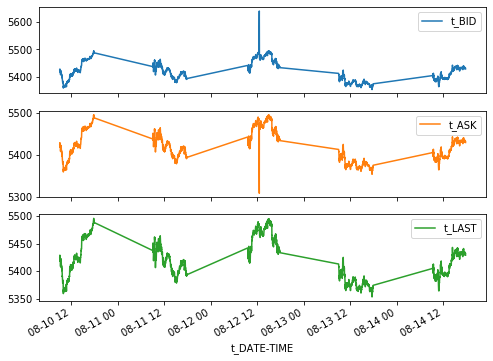

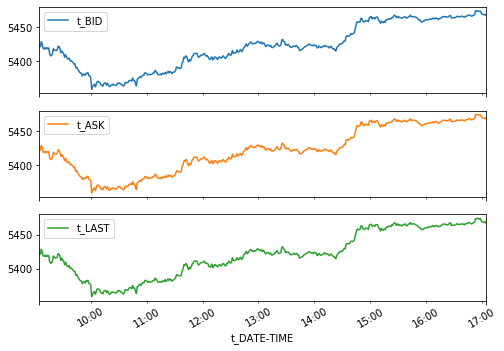

In [16]:
plot_cols = full_feature_list[:3]
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

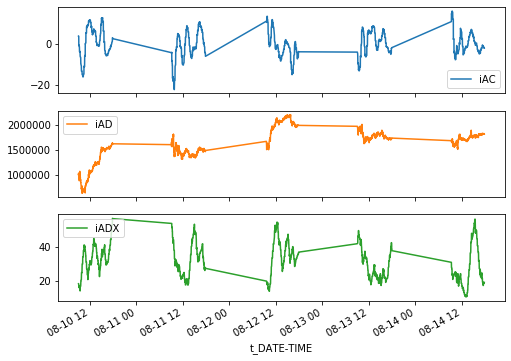

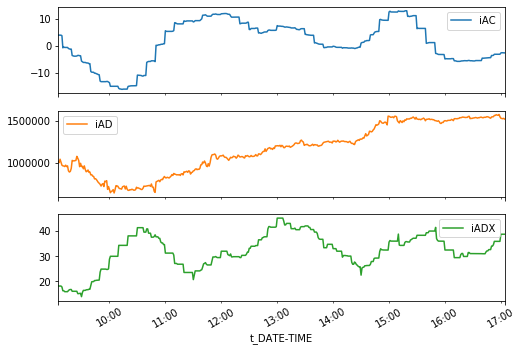

In [18]:
plot_cols = full_feature_list[3:6]
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
t_BID,2583.0,5.418470e+03,35.629362,5353.500000,5.389500e+03,5.416000e+03,5.441000e+03,5.640000e+03
t_ASK,2583.0,5.418863e+03,35.428178,5309.000000,5.390000e+03,5.416500e+03,5.441500e+03,5.495500e+03
t_LAST,2583.0,5.418656e+03,35.387585,5353.500000,5.389500e+03,5.416500e+03,5.441500e+03,5.495500e+03
t_VOLUME,2583.0,2.294232e+00,3.324928,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.700000e+01
t_TYPE,2583.0,5.013550e-01,0.500095,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
iAC,2583.0,1.715083e-02,6.527982,-22.178824,-3.860294e+00,-5.867650e-01,5.127648e+00,1.618118e+01
iAD,2583.0,1.633006e+06,323148.738897,636545.302425,1.481105e+06,1.707672e+06,1.819306e+06,2.213708e+06
iADX,2583.0,3.143386e+01,10.400669,10.401742,2.288881e+01,3.102705e+01,3.872396e+01,5.715533e+01
iADXWilder,2583.0,2.665213e+01,7.135505,12.273081,2.138746e+01,2.540175e+01,3.187040e+01,4.475057e+01
iAlligator,2583.0,5.419579e+03,27.673687,5373.528158,5.396766e+03,5.416506e+03,5.442881e+03,5.475621e+03


#### Volume
The last column of the data, `iVolumes`, gives the volume. Volume is strict connect to the current flow of `t_LAST`
Right now the distribution of volume data looks like this:

Text(0, 0.5, 'iVolumes')

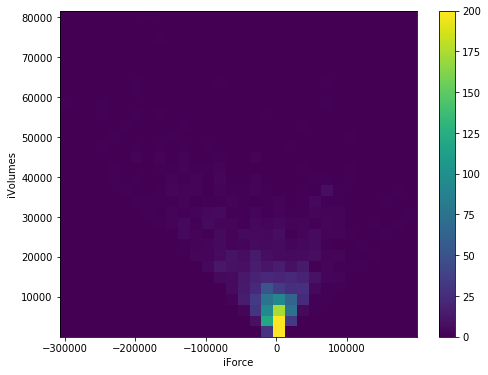

In [21]:
plt.hist2d(df['iForce'], df['iVolumes'], bins=(30, 30), vmax=200)
plt.colorbar()
plt.xlabel('iForce')
plt.ylabel('iVolumes')

In [22]:
v = df['iVolumes']
#v = df.pop('iVolumes')
# Convert to radians.
v_rad = df['iForce']*np.pi / 180
#v_rad = df.pop('t_TYPE')*np.pi / 180
# Calculate the wind x and y components.
df['Vx'] = v*np.cos(v_rad)
df['Vy'] = v*np.sin(v_rad)

(-54178.553376523436, 57612.43991097653, -73228.4318218107, 62095.63668442773)

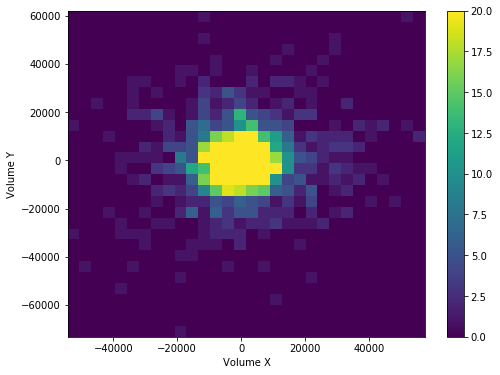

In [23]:
plt.hist2d(df['Vx'], df['Vy'], bins=(30, 30), vmax=20)
plt.colorbar()
plt.xlabel('Volume X')
plt.ylabel('Volume Y')
ax = plt.gca()
ax.axis('tight')

#### Time

In [24]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [25]:
timestamp_s

0       1.597061e+09
1       1.597061e+09
2       1.597061e+09
3       1.597061e+09
4       1.597061e+09
            ...     
2578    1.597438e+09
2579    1.597438e+09
2580    1.597438e+09
2581    1.597438e+09
2582    1.597438e+09
Name: t_DATE-TIME, Length: 2583, dtype: float64

In [26]:
day = 24*60*60

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

Text(0.5, 1.0, 'Time of day signal')

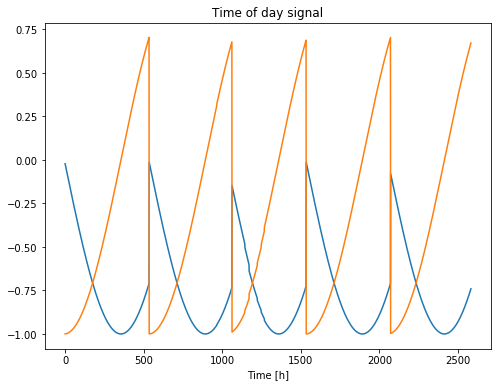

In [27]:
plt.plot(np.array(df['Day sin'])[:])
plt.plot(np.array(df['Day cos'])[:])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [28]:
df

,t_BID,t_ASK,t_LAST,t_VOLUME,t_TYPE,iAC,iAD,iADX,iADXWilder,iAlligator,iAMA,iAO,iATR,iBearsPower,iBands,iBullsPower,iCCI,iChaikin,iDEMA,iDeMarker,iEnvelopes,iForce,iFrAMA,iIchimoku,iBWMFI,iMomentum,iMFI,iMA,iOsMA,iMACD,iOBV,iSAR,iRSI,iRVI,iStdDEV,iStochastic,iTEMA,iTriX,iVIDyA,iVolumes,Vx,Vy,Day sin,Day cos
0,5423.5,5424.0,5423.5,1.0,1,3.970588,1.010346e+06,18.239431,18.508609,5424.631021,5429.410395,4.560294,9.071429,-7.376303,5427.525,9.623697,7.299270,-2679.886984,5430.831194,0.623932,5433.14200,-10076.000000,5427.356992,5430.00,0.501935,99.907894,36.427225,5428.00,0.811465,2.225075,495090.0,5419.945438,47.685062,0.102775,6.193696,51.798561,5431.452674,0.000027,5420.971868,20152.0,20102.910741,1405.732459,-0.021815,-0.999762
1,5421.5,5422.0,5421.5,4.0,1,3.936471,1.000479e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-7.590588,5427.425,9.909412,-3.261123,-3947.916396,5430.333416,0.618644,5432.99900,-13456.807692,5427.308224,5430.00,0.511596,99.871051,36.301022,5427.80,0.669648,2.065530,494661.0,5419.945438,46.551581,0.098563,6.273506,49.285714,5430.754600,0.000026,5420.962638,20581.0,-15004.794599,-14086.649709,-0.026177,-0.999657
2,5428.5,5429.0,5429.0,1.0,0,3.936471,1.041720e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-8.662017,5427.800,8.837983,27.711797,1375.856331,5432.200083,0.618644,5433.53525,-2072.615385,5427.491103,5430.00,0.455729,100.009211,34.511246,5428.55,1.201462,2.663821,488298.0,5419.945438,51.107176,0.113963,6.130661,60.000000,5433.372377,0.000030,5420.997643,26944.0,1229.487833,26915.933862,-0.030539,-0.999534
3,5425.0,5425.5,5425.0,5.0,1,3.936471,1.006114e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-8.090588,5427.600,9.409412,11.460856,-3220.998214,5431.204527,0.618644,5433.24925,-11728.461538,5427.393567,5430.00,0.460063,99.935525,33.590583,5428.15,0.917828,2.344733,484748.0,5419.945438,48.572070,0.105749,6.153454,54.285714,5431.976229,0.000028,5420.969177,30494.0,-26808.410565,14532.486332,-0.034899,-0.999391
4,5419.0,5419.5,5419.5,3.0,0,3.731765,9.701307e+05,17.797412,18.024343,5424.631021,5429.376774,4.261765,9.321429,-10.304874,5427.325,10.195126,-23.956194,-7696.245664,5429.835638,0.588710,5432.85600,-28963.846154,5427.259456,5430.00,0.515454,99.834208,32.290619,5427.60,0.527831,1.905986,479382.0,5445.000000,45.470734,0.093878,6.382153,48.630137,5430.056526,0.000025,5420.939686,35860.0,-34444.179510,-9976.878164,-0.039260,-0.999229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578,5432.5,5433.0,5432.5,1.0,1,-1.662941,1.830007e+06,18.457428,19.302676,5420.466269,5429.573232,12.482353,8.678571,-0.479630,5432.375,3.020370,2.845528,3218.394125,5436.155187,0.351064,5439.00500,-1202.000000,5432.494729,5433.25,0.735233,100.082903,44.008852,5432.95,-1.616900,6.069133,110203.0,5422.047258,55.850140,-0.018664,4.543883,49.494949,5433.429357,0.000205,5420.431941,2404.0,-1273.925911,-2038.707623,-0.751840,0.659346
2579,5432.0,5432.5,5432.0,1.0,1,-1.697059,1.828713e+06,18.457428,19.302676,5420.466269,5429.572894,12.439706,8.714286,-0.908201,5432.350,3.091799,-7.703446,3099.644125,5436.030743,0.351064,5438.96925,-1511.461538,5432.443378,5433.25,0.874005,100.073692,44.176782,5432.90,-1.652354,6.029247,109800.0,5422.047258,55.406786,-0.019627,4.544502,48.484848,5433.254838,0.000205,5420.442511,2807.0,892.460903,-2661.346001,-0.748956,0.662620
2580,5431.5,5432.0,5432.0,1.0,0,-1.697059,1.828005e+06,18.457428,19.302676,5420.466269,5429.572894,12.439706,8.714286,-0.908201,5432.350,3.091799,-7.703446,3052.553216,5436.030743,0.351064,5438.96925,-1670.846154,5432.443378,5433.25,0.910946,100.073692,44.299530,5432.90,-1.652354,6.029247,109504.0,5422.047258,55.406786,-0.019627,4.544502,48.484848,5433.254838,0.000205,5420.442511,3103.0,-1959.249248,2406.231781,-0.746057,0.665882
2581,5432.0,5432.5,5432.5,1.0,0,-1.697059,1.830392e+

In [111]:
bkp_df = df
df = df.drop(columns=['iFractals','t_VOLUME','iWPR','t_TYPE', 'iAC', 'iAD','iADX','iADXWilder','iATR','iBearsPower','iBands','iChaikin','iDeMarker','iForce','iFrAMA','iIchimoku','iBWMFI','iMomentum','iMFI','iMA','iOsMA','iOBV','iSAR','iRSI','iRVI','iStochastic','iVolumes'])
df.head(3)

,t_BID,t_ASK,t_LAST,t_VOLUME,iAlligator,iAMA,iAO,iBullsPower,iCCI,iDEMA,iEnvelopes,iMACD,iStdDEV,iTEMA,iTriX,iVIDyA,Vx,Vy,Day sin,Day cos
0,5423.5,5424.0,5423.5,1.0,5424.631021,5429.410395,4.560294,9.623697,7.299270,5430.831194,5433.14200,2.225075,6.193696,5431.452674,0.000027,5420.971868,20102.910741,1405.732459,-0.021815,-0.999762
1,5421.5,5422.0,5421.5,4.0,5424.631021,5429.404214,4.517647,9.909412,-3.261123,5430.333416,5432.99900,2.065530,6.273506,5430.754600,0.000026,5420.962638,-15004.794599,-14086.649709,-0.026177,-0.999657
2,5428.5,5429.0,5429.0,1.0,5424.631021,5429.404214,4.517647,8.837983,27.711797,5432.200083,5433.53525,2.663821,6.130661,5433.372377,0.000030,5420.997643,1229.487833,26915.933862,-0.030539,-0.999534


In [114]:
df.columns

Index(['t_BID', 't_ASK', 't_LAST', 't_VOLUME', 'iAlligator', 'iAMA', 'iAO',
       'iBullsPower', 'iCCI', 'iDEMA', 'iEnvelopes', 'iMACD', 'iStdDEV',
       'iTEMA', 'iTriX', 'iVIDyA', 'Vx', 'Vy', 'Day sin', 'Day cos'],
      dtype='object')

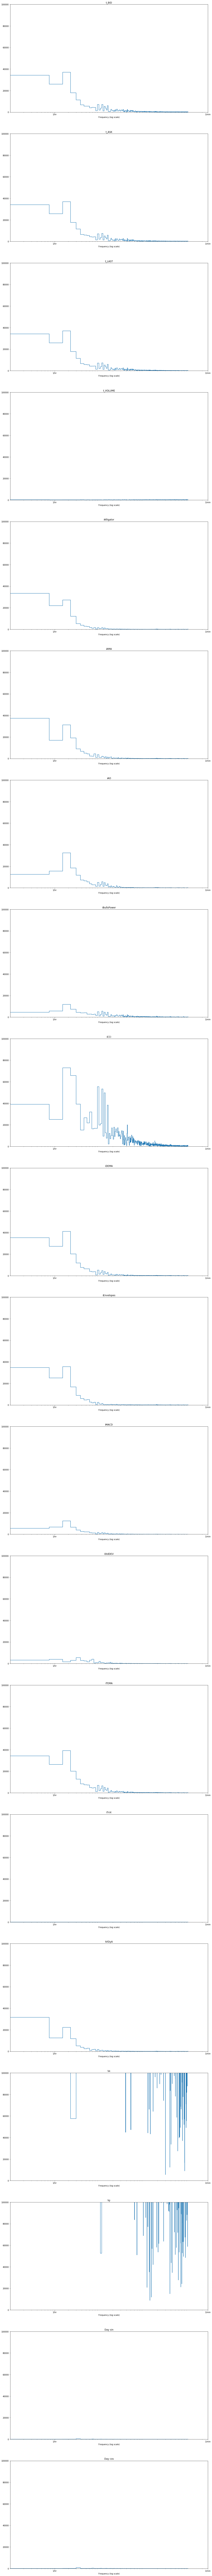

In [115]:
plt.figure(figsize=(18, 240))
full_feature_list = df.columns
for index in range(len(full_feature_list)):
    if full_feature_list[index] == 'iFractals':
        continue
    if full_feature_list[index] == 'iWPR':
        continue
    plt.subplot(len(full_feature_list), 1, index+1)
    fft = tf.signal.rfft(df[full_feature_list[index]])
    f_per_dataset = np.arange(0, len(fft))

    n_samples_h = 60
    hours_per_week = 9*5
    years_per_dataset = n_samples_h/(hours_per_week)

    f_per_year = f_per_dataset/years_per_dataset
    plt.step(f_per_year, np.abs(fft))
    plt.xscale('log')
    plt.ylim(0, 100000)
    plt.xlim([0.1, max(plt.xlim())])
    plt.xticks([1, 2700], labels=['1/hr', '1/min'])
    _ = plt.xlabel('Frequency (log scale)')
    plt.title(full_feature_list[index])

In [116]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

### Normalize the data

In [117]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

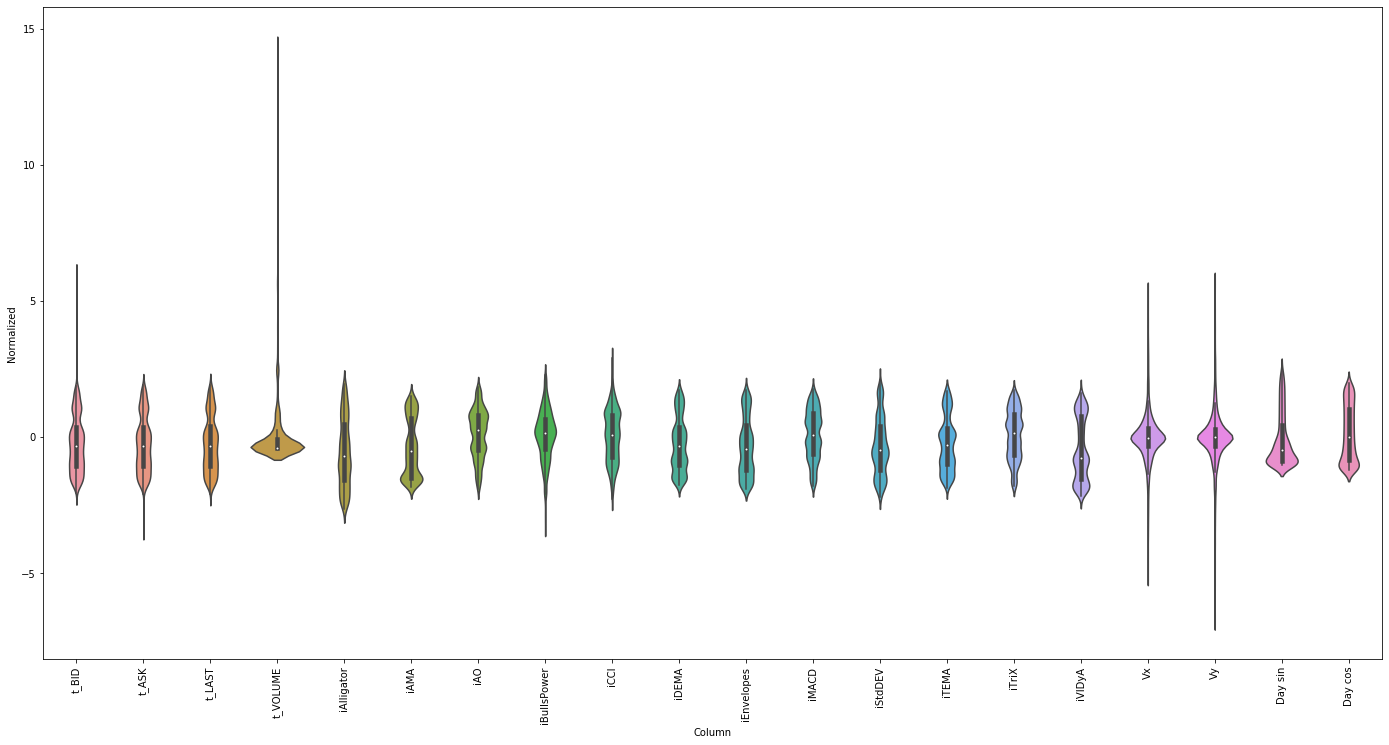

In [118]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(24, 12))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [119]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [120]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['t_LAST'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['t_LAST']

In [121]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['t_LAST'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['t_LAST']

### 2. Split

In [122]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [123]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 20)
Inputs shape: (3, 6, 20)
labels shape: (3, 1, 1)


### 3. Plot

In [124]:
w2.example = example_inputs, example_labels

In [125]:
def plot(self, model=None, plot_col='t_LAST', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

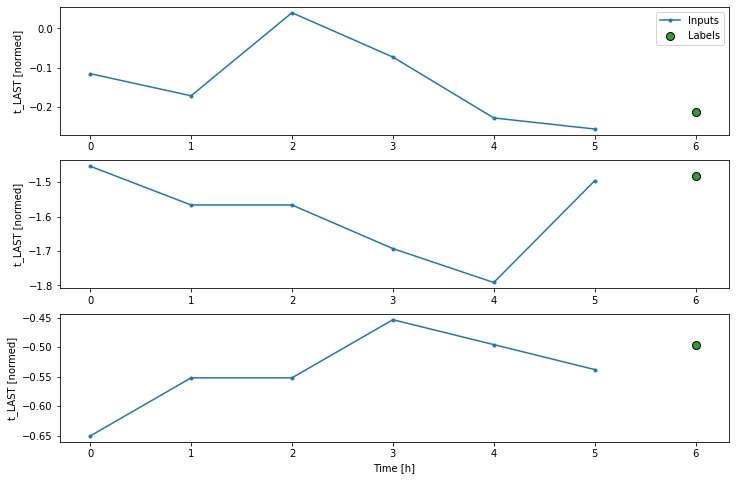

In [126]:
w2.plot()

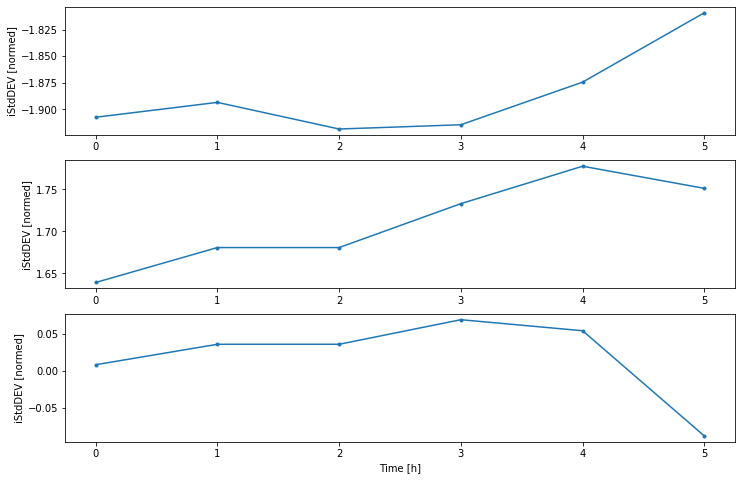

In [127]:
w2.plot(plot_col='iStdDEV')

### 4. Create `tf.data.Dataset`s

In [128]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [129]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [130]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 20), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [131]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 20)
Labels shape (batch, time, features): (32, 1, 1)


## Single step models

In [132]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['t_LAST', 'iStdDEV'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['t_LAST', 'iStdDEV']

In [133]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 20)
Labels shape (batch, time, features): (32, 1, 2)


### Baseline

In [134]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [135]:
baseline = Baseline(label_index=column_indices['t_LAST'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

17/17 [==============================] - 0s 2ms/step - loss: 0.0998 - mean_absolute_error: 0.2001


In [136]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['t_LAST', 'iStdDEV'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['t_LAST', 'iStdDEV']

In [137]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 20)
Output shape: (32, 1, 1)


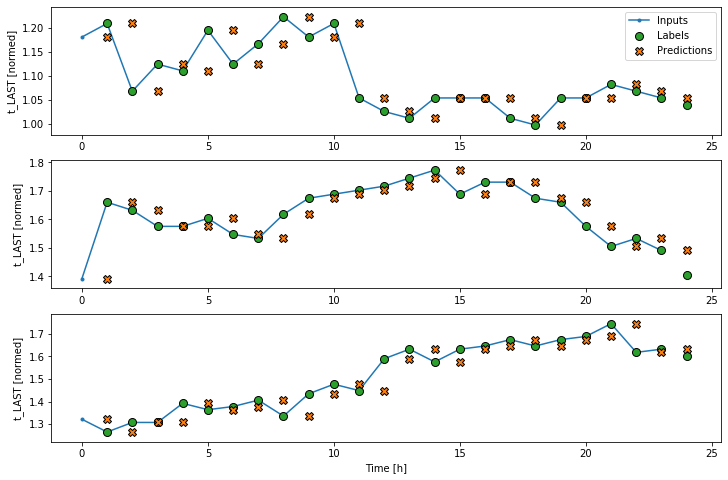

In [138]:
wide_window.plot(baseline)

### Linear model

In [139]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [140]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 20)
Output shape: (32, 1, 1)


In [235]:
# callbacks = myCallback()
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.02):
            print("\nReached 0.02 loss or fewer cancelling training")
            self.model.stop_training = True

In [236]:
MAX_EPOCHS = 100
callback1 = myCallback()

def compile_and_fit(model, window, patience=5):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),
                metrics=[tf.metrics.MeanAbsoluteError()])
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping, callback1])
  return history

In [143]:
MAX_EPOCHS = 100
callbacks = myCallback()

In [144]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
57/57 [==============================] - 0s 6ms/step - loss: 1.5430 - mean_absolute_error: 1.0418 - val_loss: 1.1619 - val_mean_absolute_error: 0.8444
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 1.1304 - mean_absolute_error: 0.8651 - val_loss: 0.8986 - val_mean_absolute_error: 0.7692
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.9419 - mean_absolute_error: 0.7679 - val_loss: 0.6571 - val_mean_absolute_error: 0.6780
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.8412 - mean_absolute_error: 0.7139 - val_loss: 0.5040 - val_mean_absolute_error: 0.6058
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 0.7846 - mean_absolute_error: 0.6812 - val_loss: 0.3916 - val_mean_absolute_error: 0.5351
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 0.7499 - mean_absolute_error: 0.6627 - val_loss: 0.3271 - val_mean_absolute_error: 0.4891
Epoch 7/100
57/57 [===

In [145]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 20)
Output shape: (32, 24, 1)


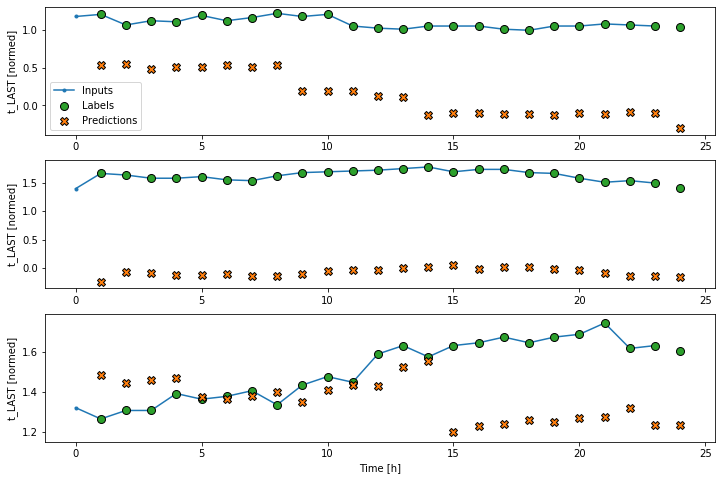

In [146]:
wide_window.plot(linear)

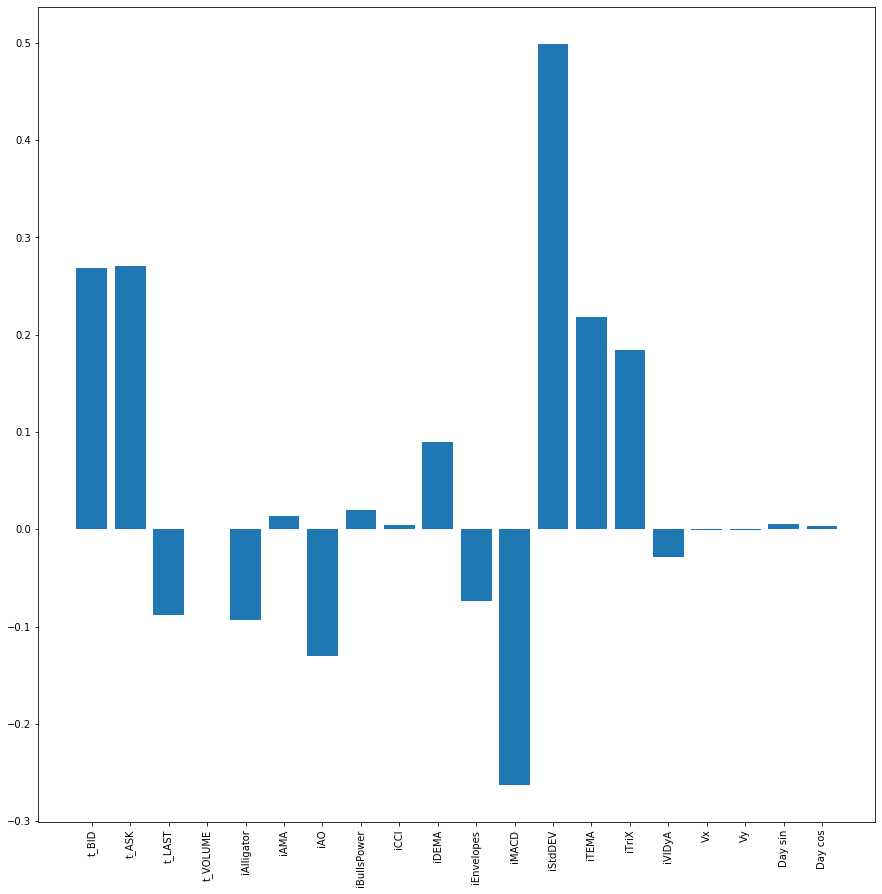

In [147]:
plt.figure(figsize=(15,15))
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### Dense

In [148]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
57/57 [==============================] - 0s 8ms/step - loss: 0.7488 - mean_absolute_error: 0.6788 - val_loss: 0.0853 - val_mean_absolute_error: 0.2438
Epoch 2/100
57/57 [==============================] - 0s 5ms/step - loss: 0.6583 - mean_absolute_error: 0.6236 - val_loss: 0.0837 - val_mean_absolute_error: 0.2424
Epoch 3/100
57/57 [==============================] - 0s 5ms/step - loss: 0.6543 - mean_absolute_error: 0.6209 - val_loss: 0.0752 - val_mean_absolute_error: 0.2256
Epoch 4/100
57/57 [==============================] - 0s 5ms/step - loss: 0.6521 - mean_absolute_error: 0.6200 - val_loss: 0.0788 - val_mean_absolute_error: 0.2336
Epoch 5/100
57/57 [==============================] - 0s 5ms/step - loss: 0.6516 - mean_absolute_error: 0.6196 - val_loss: 0.0640 - val_mean_absolute_error: 0.2016
Epoch 6/100
57/57 [==============================] - 0s 5ms/step - loss: 0.6510 - mean_absolute_error: 0.6194 - val_loss: 0.0743 - val_mean_absolute_error: 0.2235
Epoch 7/100
57/57 [===

### Multi-step dense

In [204]:
CONV_WIDTH = 10
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['t_LAST'])

conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10]
Label column name(s): ['t_LAST']

Text(0.5, 1.0, 'Given 3m as input, predict 1m into the future.')

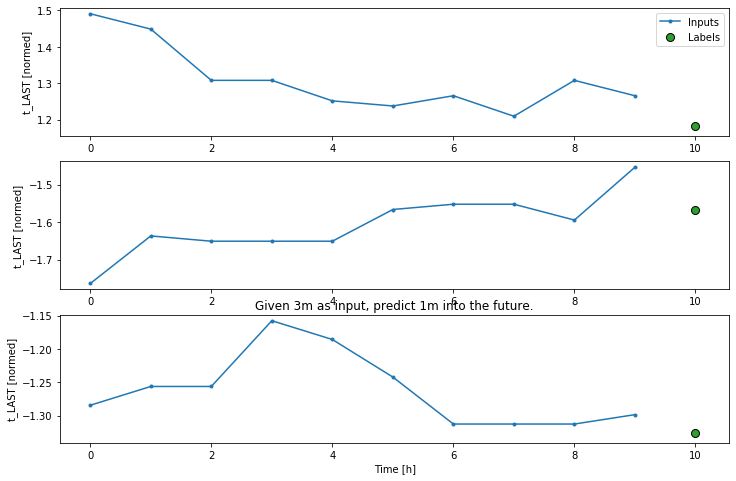

In [205]:
conv_window.plot()
plt.title("Given 3m as input, predict 1m into the future.")

### ||||====================================================================||||

In [221]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [222]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 10, 20)
Output shape: (32, 1, 20)


In [253]:
MAX_EPOCHS=200
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

16/16 [==============================] - 0s 2ms/step - loss: 0.0541 - mean_absolute_error: 0.1714


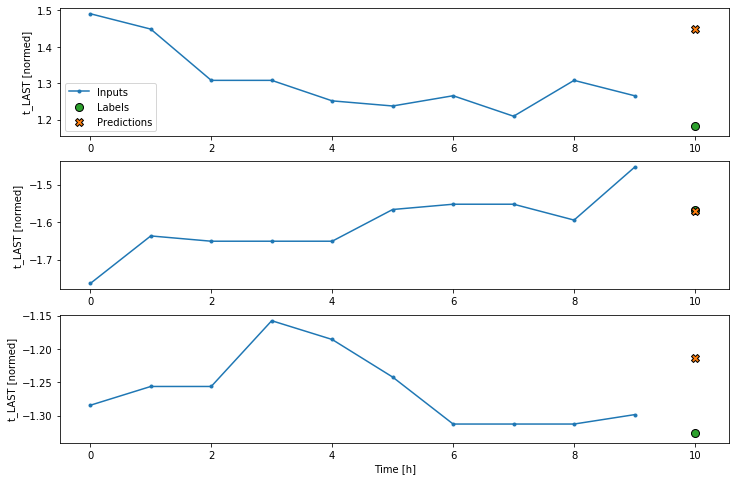

In [254]:
conv_window.plot(multi_step_dense)

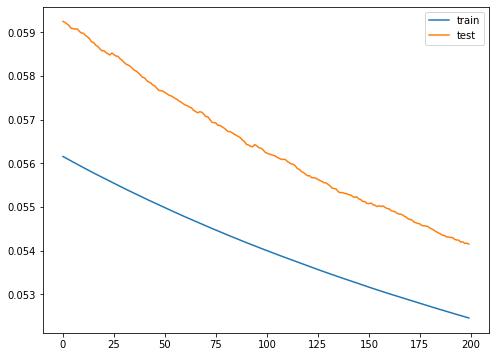

In [255]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [266]:
multi_step_dense.evaluate(conv_window.test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0305 - mean_absolute_error: 0.1384


[0.030514772981405258, 0.13839338719844818]

In [232]:
multi_step_dense.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 10, 64)            1344      
_________________________________________________________________
dense_63 (Dense)             (None, 10, 64)            4160      
_________________________________________________________________
dense_64 (Dense)             (None, 10, 2)             130       
_________________________________________________________________
reshape_6 (Reshape)          (None, 1, 20)             0         
Total params: 5,634
Trainable params: 5,634
Non-trainable params: 0
_________________________________________________________________


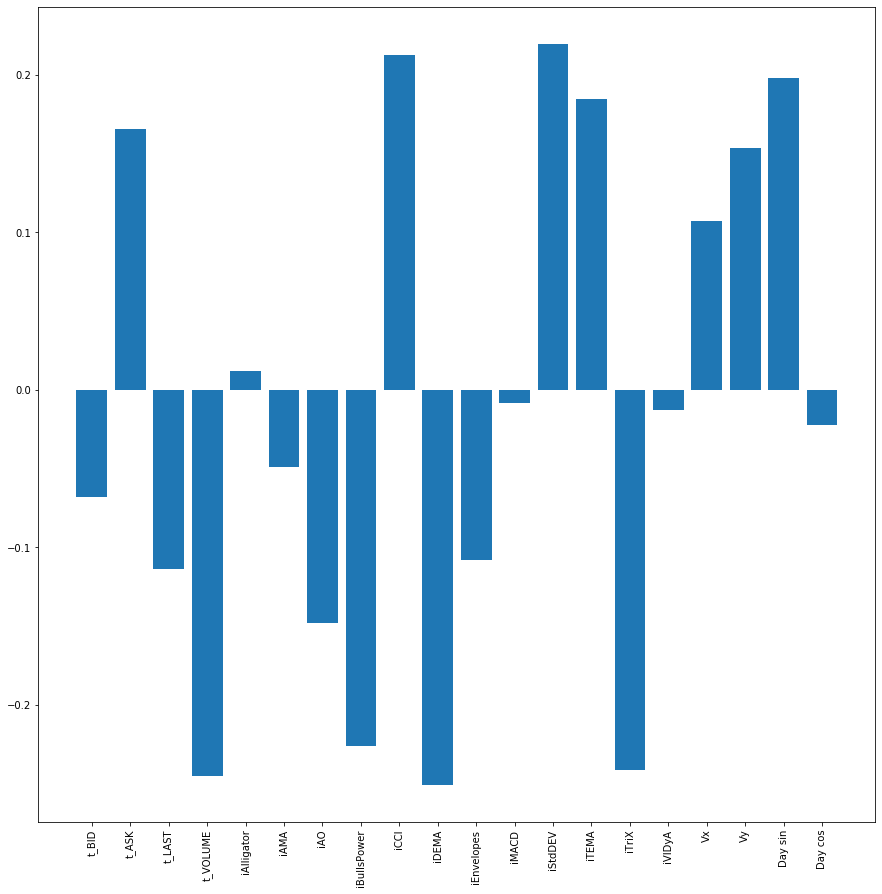

In [256]:
plt.figure(figsize=(15,15))
plt.bar(x = range(len(train_df.columns)),
        height=multi_step_dense.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [233]:
multi_step_dense.save('models/multi_step_dense')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/multi_step_dense\assets


In [155]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 20)

InvalidArgumentError:Matrix size-incompatible: In[0]: [32,480], In[1]: [60,32] [Op:MatMul]


### Convolution neural network

In [258]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [259]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 10, 20)
Output shape: (32, 1, 1)


In [260]:
MAX_EPOCHS=150
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

16/16 [==============================] - 0s 2ms/step - loss: 0.0507 - mean_absolute_error: 0.1567


In [261]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 10, 20)
Labels shape: (32, 1, 20)
Output shape: (32, 1, 1)


In [262]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['t_LAST'])

wide_conv_window

Total window size: 34
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
Label indices: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Label column name(s): ['t_LAST']

In [263]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 33, 20)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


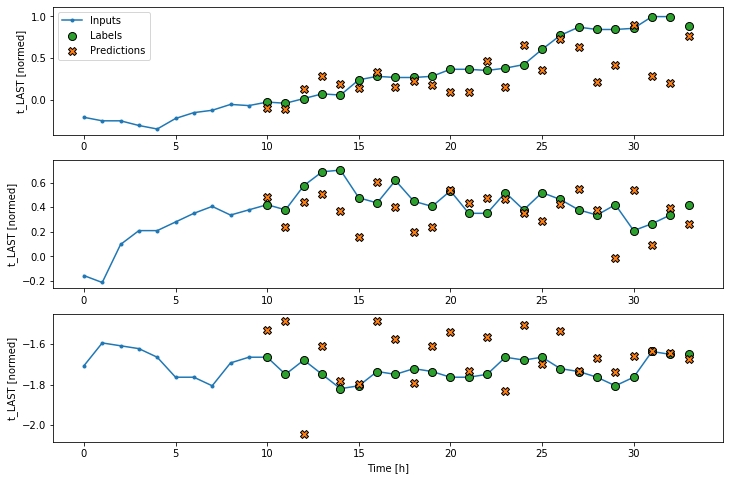

In [264]:
wide_conv_window.plot(conv_model)

### Recurrent neural network

In [163]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [164]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 20)
Output shape: (32, 24, 1)


In [165]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

16/16 [==============================] - 0s 5ms/step - loss: 0.1128 - mean_absolute_error: 0.2691


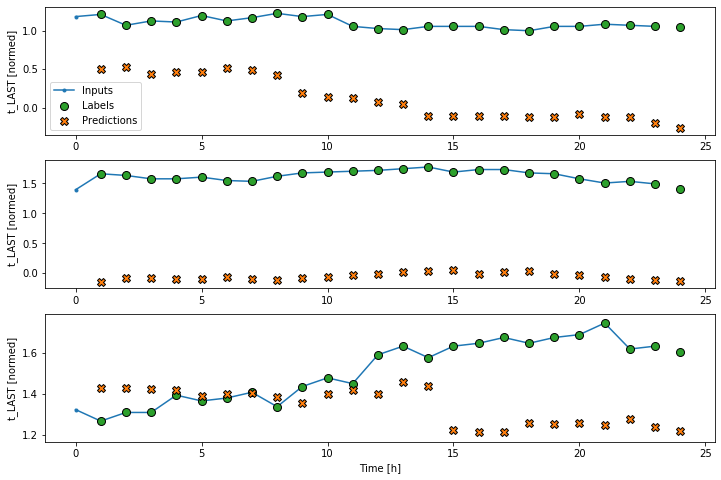

In [166]:
wide_window.plot(lstm_model)

### Performance

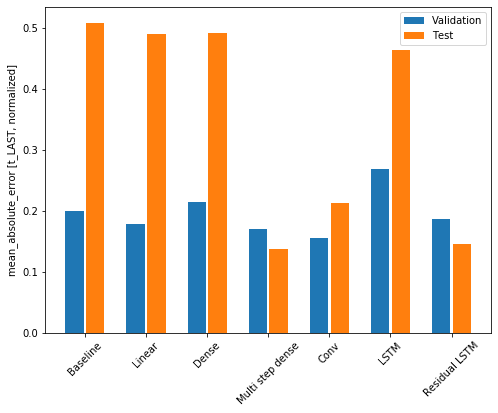

In [265]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [t_LAST, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [168]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.5092
Linear      : 0.4913
Dense       : 0.4929
Multi step dense: 0.1102
Conv        : 0.1093
LSTM        : 0.4647


#### Advanced: Residual connections

In [226]:
wide_window = WindowGenerator(
    input_width=10, label_width=1, shift=1)

In [227]:
wide_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10]
Label column name(s): None

In [228]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

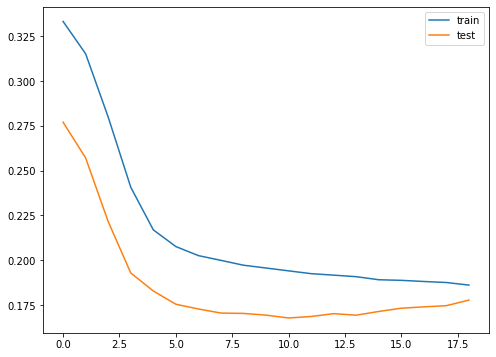

In [173]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

### Advanced: Autoregressive model

#### RNN

In [202]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [203]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

NameError: name 'OUT_STEPS' is not defined

The first method this model needs is a `warmup` method to initialize its internal state based on the inputs. Once trained this state will capture the relevant parts of the input history. This is equivalent to the single-step `LSTM` model from earlier:

In [149]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

This method returns a single time-step prediction, and the internal state of the LSTM:

In [150]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 45])

Note: Stacking a python list like this only works with eager-execution, using `Model.compile(..., run_eagerly=True)` for training, or with a fixed length output. For a dynamic output length you would need to use a `tf.TensorArray` instead of a python list, and `tf.range` instead of the python `range`.

In [151]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [152]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 10, 45)


16/16 [==============================] - 0s 5ms/step - loss: 0.5787 - mean_absolute_error: 0.5876


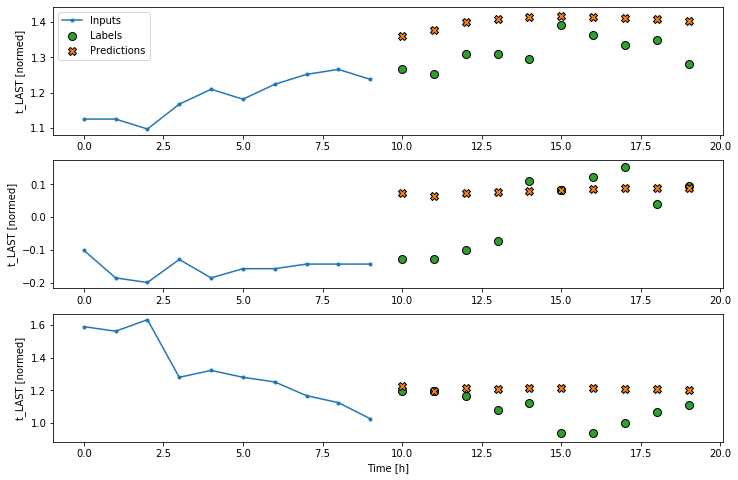

In [153]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)